In [3]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/nlp-lab-group13/code

/content/drive/My Drive/Colab Notebooks/nlp-lab-group13/code


In [22]:
import os, fnmatch
def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

In [34]:
all_files=sorted(find('aspect*','../post_train_output/bilingual/MUSE_supervised/en_2_de/epoch_15_filtered_fasttext'))

In [35]:
all_files

['../post_train_output/bilingual/MUSE_supervised/en_2_de/epoch_15_filtered_fasttext/aspect_300_10.log',
 '../post_train_output/bilingual/MUSE_supervised/en_2_de/epoch_15_filtered_fasttext/aspect_300_13.log',
 '../post_train_output/bilingual/MUSE_supervised/en_2_de/epoch_15_filtered_fasttext/aspect_300_16.log',
 '../post_train_output/bilingual/MUSE_supervised/en_2_de/epoch_15_filtered_fasttext/aspect_300_19.log',
 '../post_train_output/bilingual/MUSE_supervised/en_2_de/epoch_15_filtered_fasttext/aspect_300_22.log',
 '../post_train_output/bilingual/MUSE_supervised/en_2_de/epoch_15_filtered_fasttext/aspect_300_24.log',
 '../post_train_output/bilingual/MUSE_supervised/en_2_de/epoch_15_filtered_fasttext/aspect_300_25.log',
 '../post_train_output/bilingual/MUSE_supervised/en_2_de/epoch_15_filtered_fasttext/aspect_300_28.log',
 '../post_train_output/bilingual/MUSE_supervised/en_2_de/epoch_15_filtered_fasttext/aspect_300_29.log',
 '../post_train_output/bilingual/MUSE_supervised/en_2_de/epoch_1

In [38]:
import os
import sys
not_executed=[]
for file in all_files:
    command="./coherence_score.py -f "+file+" -c "+"../preprocessed_data/german/whole_comments.txt >> ../post_train_output/german/glove/epoch_15/coherence_result.txt"
    print(command)
    result=os.system('%s %s' % (sys.executable, command))
    if result==0:
        print("completed")
    else:
        not_executed.append(file)

./coherence_score.py -f ../post_train_output/german/glove/epoch_15/aspect_300_10.log -c ../preprocessed_data/german/whole_comments.txt >> ../post_train_output/german/glove/epoch_15/coherence_result.txt
completed
./coherence_score.py -f ../post_train_output/german/glove/epoch_15/aspect_300_13.log -c ../preprocessed_data/german/whole_comments.txt >> ../post_train_output/german/glove/epoch_15/coherence_result.txt
completed
./coherence_score.py -f ../post_train_output/german/glove/epoch_15/aspect_300_16.log -c ../preprocessed_data/german/whole_comments.txt >> ../post_train_output/german/glove/epoch_15/coherence_result.txt
completed
./coherence_score.py -f ../post_train_output/german/glove/epoch_15/aspect_300_19.log -c ../preprocessed_data/german/whole_comments.txt >> ../post_train_output/german/glove/epoch_15/coherence_result.txt
completed
./coherence_score.py -f ../post_train_output/german/glove/epoch_15/aspect_300_22.log -c ../preprocessed_data/german/whole_comments.txt >> ../post_train_

In [39]:
not_executed

[]

In [9]:
!python ./coherence_score.py -f ../post_train_output/german/glove/epoch_15/aspect_300_50.log -c ../preprocessed_data/german/whole_comments.txt >> ../post_train_output/german/glove/epoch_15/coherence_result.txt

In [18]:
import coherence_score as cscore
import multiprocessing as mp

def worker(file,result):
    print("starting ",mp.current_process().name)
    size,_,_,score,_=cscore.getCoherenceScore(file, '../preprocessed_data/bilingual/whole_comments_filtered.txt')
    #size,_,_,score,_=cscore.getCoherenceScore(file, '../coherence_analysis_ref/processed_comments.txt')
    result[size]=score
    print("Exiting ",mp.current_process().name)
jobs = []
result = mp.Manager().dict()
for i, file in enumerate(all_files):
    p = mp.Process(name='file'+str(i), target=worker, args=(file,result))
    jobs.append(p)
    p.start()
for job in jobs:
    job.join()
result

starting  file0
starting  file1
starting  file2
starting  file3
starting  file4
starting  file5
starting  file6
starting  file7
starting  file8
starting  file10
starting  file9
starting  file11
starting  file12
starting  file13
starting  file14
starting  file17
starting  file15
starting  file16
starting  file18
starting  file19
starting  file21
starting  file20
Exiting  file19
Exiting  file20
Exiting  file21
Exiting  file0
Exiting  file1
Exiting  file2
Exiting  file3
Exiting  file4
Exiting  file5
Exiting  file6
Exiting  file7
Exiting  file8
Exiting  file10
Exiting  file9
Exiting  file12
Exiting  file11
Exiting  file13
Exiting  file14
Exiting  file15
Exiting  file16
Exiting  file18
Exiting  file17


<DictProxy object, typeid 'dict' at 0x7fd566079cc0>

In [19]:
with open('../post_train_output/bilingual/MUSE_supervised/de_2_en/epoch_15_filtered_w2v/coherence_result.txt','w') as fout:
    for key, value in result.items():
        print(key, value)
        fout.write(str(key)+":"+str(value)+"\n")

7 -4683.23
8 -4620.64
9 -4853.47
10 -4689.1
13 -4838.18
16 -4753.21
19 -4824.64
22 -4795.16
24 -4771.64
25 -4894.64
28 -4737.2
29 -4735.64
30 -4653.48
31 -4724.86
34 -4636.89
35 -4740.37
37 -4703.49
40 -4598.84
43 -4568.85
46 -4651.9
49 -4611.71
50 -4614.96


## https://github.com/jhlau/topic_interpretability

In [66]:
import coherence_score as cscore
import codecs
import subprocess
import os
fout_c = codecs.open('../post_train_output/fasttext/full_trained/epoch_15_filtered/coherence_score_npmi_amazon.csv','w',encoding='utf-8')
fout_c.write('Number of clusters, Avarge Mean Score, Avarge Median Score\n')
for file in all_files:
    get_dir = os.path.dirname(file)
    wordlist = cscore.getWordList(file)
    fout = codecs.open(get_dir+'/topics.txt','w',encoding='utf-8')
    for w in wordlist:
        fout.write(" ".join(w[:20])+'\n')
    fout.close()
    subprocess.run(['cp',get_dir+'/topics.txt','../topic_interpretability/data/'])
    curr_dir = os.getcwd()
    os.chdir('../topic_interpretability/')
    r=subprocess.run(['./run-oc.sh'])
    print(r)
    fin = codecs.open('results/topics-oc.txt','r',encoding='utf-8')
    last_2_lines = fin.readlines()[-2:]
    fin.close()
    os.chdir(curr_dir)
    data = [line.strip().split()[-1:][0] for line in last_2_lines]
    print(data)
    fout_c.write('{}, {}, {}\n'.format(len(wordlist),float(data[0]),float(data[1])))
fout_c.close()

CompletedProcess(args=['./run-oc.sh'], returncode=0)
['0.006', '0.005']
CompletedProcess(args=['./run-oc.sh'], returncode=0)
['0.010', '0.004']
CompletedProcess(args=['./run-oc.sh'], returncode=0)
['0.014', '0.004']
CompletedProcess(args=['./run-oc.sh'], returncode=0)
['0.012', '0.002']
CompletedProcess(args=['./run-oc.sh'], returncode=0)
['0.009', '0.004']
CompletedProcess(args=['./run-oc.sh'], returncode=0)
['0.015', '0.007']
CompletedProcess(args=['./run-oc.sh'], returncode=0)
['0.016', '0.007']
CompletedProcess(args=['./run-oc.sh'], returncode=0)
['0.019', '0.007']
CompletedProcess(args=['./run-oc.sh'], returncode=0)
['0.014', '0.006']
CompletedProcess(args=['./run-oc.sh'], returncode=0)
['0.014', '0.007']
CompletedProcess(args=['./run-oc.sh'], returncode=0)
['0.010', '0.005']
CompletedProcess(args=['./run-oc.sh'], returncode=0)
['0.014', '0.007']
CompletedProcess(args=['./run-oc.sh'], returncode=0)
['0.009', '0.006']
CompletedProcess(args=['./run-oc.sh'], returncode=0)
['0.015', '

In [ ]:
!rm -rf ../topic_interpretability/ref_corpus/organic_food
!mkdir ../topic_interpretability/ref_corpus/organic_food

### corpus partition

In [18]:
import coherence_score as cscore
import codecs
#full_corpus = cscore.commentset('../coherence_analysis_ref/processed_comments.txt')
full_corpus = cscore.commentset('../preprocessed_data/whole_comments.txt')
if len(full_corpus)%50000:
    iteration = len(full_corpus)//50000+1
else:
    iteration = len(full_corpus)//50000
for i in range(iteration):
    fout=codecs.open('../topic_interpretability/ref_corpus/organic_food/corpus.{}'.format(i),'w',encoding='utf-8')
    for comment in full_corpus[i*50000:50000]:
        fout.write(comment+'\n')
    fout.close()

### Glove based cosine similarity

In [1]:
from word_embedding import Glove
gv = Glove()
gv.convert_glove_2_w2v_type2('../preprocessed_data/german/glove/pretrained/vectors.txt','../preprocessed_data/german/glove/pretrained/glove.300d_w2v_format.txt')

Using TensorFlow backend.


In [68]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('../preprocessed_data/german/glove/pretrained/glove.300d_w2v_format.txt')

In [77]:
import os
import numpy as np
import coherence_score as cscore
import codecs
fout_c = codecs.open('../post_train_output/german/w2v/fine_tuned/epoch_15_filtered_ortho_procrustes/coherence_wetc_glove.csv','w',encoding='utf-8')
fout_c.write('Number of clusters, Avarge Mean Score, Avarge Median Score\n')
for file in all_files:
    get_dir = os.path.dirname(file)
    wordlist = cscore.getWordList(file)
    cluster_cs = []
    for word_cluster in wordlist:
        vector_matrix = [model[word] for word in word_cluster if word in model.wv]
        vector_matrix = np.array(vector_matrix)
        vector_matrix /= np.linalg.norm(vector_matrix, axis =-1, keepdims=True)
        #print(np.linalg.norm(vector_matrix)**2)
        eeT = np.dot(vector_matrix,vector_matrix.T)
        cs = (np.sum(eeT)-50)/(2*50*49)
        #print(cs)
        cluster_cs.append(float(cs))
    fout_c.write('{}, {}, {}\n'.format(len(wordlist), np.mean(cluster_cs), np.median(cluster_cs)))
fout_c.close()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if sys.path[0] == '':


## fasttext based cosine similarity

In [78]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('/sharedfolder/fasttext/german/cc.de.300.vec.gz', binary=False)

In [93]:
import os
import numpy as np
import coherence_score as cscore
import codecs
fout_c = codecs.open('../post_train_output/german/glove/fine_tuned/epoch_15_filtered/coherence_wetc_fasttext.csv','w',encoding='utf-8')
fout_c.write('Number of clusters, Avarge Mean Score, Avarge Median Score\n')
for file in all_files:
    get_dir = os.path.dirname(file)
    wordlist = cscore.getWordList(file)
    cluster_cs = []
    for word_cluster in wordlist:
        vector_matrix = [model[word] for word in word_cluster if word in model.wv]
        vector_matrix = np.array(vector_matrix)
        vector_matrix /= np.linalg.norm(vector_matrix, axis =-1, keepdims=True)
        #print(np.linalg.norm(vector_matrix)**2)
        eeT = np.dot(vector_matrix,vector_matrix.T)
        cs = (np.sum(eeT)-50)/(2*50*49)
        #print(cs)
        cluster_cs.append(float(cs))
    fout_c.write('{}, {}, {}\n'.format(len(wordlist), np.mean(cluster_cs), np.median(cluster_cs)))
fout_c.close()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if sys.path[0] == '':


## w2v based cosine similarity

In [51]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('/sharedfolder/w2v/german/dewiki_20180420_300d.txt.bz2', binary=False)

In [67]:
import os
import numpy as np
import coherence_score as cscore
import codecs
fout_c = codecs.open('../post_train_output/german/glove/full_trained/epoch_15_filtered/coherence_wetc_w2v.csv','w',encoding='utf-8')
fout_c.write('Number of clusters, Avarge Mean Score, Avarge Median Score\n')
for file in all_files:
    get_dir = os.path.dirname(file)
    wordlist = cscore.getWordList(file)
    cluster_cs = []
    for word_cluster in wordlist:
        vector_matrix = [model[word] for word in word_cluster if word in model.wv]
        vector_matrix = np.array(vector_matrix)
        vector_matrix /= np.linalg.norm(vector_matrix, axis =-1, keepdims=True)
        #print(np.linalg.norm(vector_matrix)**2)
        eeT = np.dot(vector_matrix,vector_matrix.T)
        cs = (np.sum(eeT)-50)/(2*50*49)
        #print(cs)
        cluster_cs.append(float(cs))
    fout_c.write('{}, {}, {}\n'.format(len(wordlist), np.mean(cluster_cs), np.median(cluster_cs)))
fout_c.close()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if sys.path[0] == '':


## Bilingual

In [36]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('../MUSE_embedding/supervised/en_2_de/fasttext_multi_lingual_embed.txt', binary=False)

In [37]:
import os
import numpy as np
import coherence_score as cscore
import codecs
fout_c = codecs.open('../post_train_output/bilingual/MUSE_supervised/en_2_de/epoch_15_filtered_fasttext/coherence_wetc_w2v.csv','w',encoding='utf-8')
fout_c.write('Number of clusters, Avarge Mean Score, Avarge Median Score\n')
for file in all_files:
    get_dir = os.path.dirname(file)
    wordlist = cscore.getWordList(file)
    cluster_cs = []
    for word_cluster in wordlist:
        vector_matrix = [model[word] for word in word_cluster if word in model.wv]
        vector_matrix = np.array(vector_matrix)
        vector_matrix /= np.linalg.norm(vector_matrix, axis =-1, keepdims=True)
        #print(np.linalg.norm(vector_matrix)**2)
        eeT = np.dot(vector_matrix,vector_matrix.T)
        cs = (np.sum(eeT)-50)/(2*50*49)
        #print(cs)
        cluster_cs.append(float(cs))
    fout_c.write('{}, {}, {}\n'.format(len(wordlist), np.mean(cluster_cs), np.median(cluster_cs)))
fout_c.close()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if sys.path[0] == '':


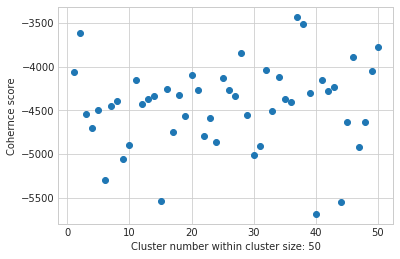

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
plt.style.use('seaborn-whitegrid')
best_cluster_coherence = [-4068.28, -3620.76, -4540.97, -4702.36, -4492.43, -5300.95, -4450.52, -4399.63, -5062.47, -4897.05, -4155.9, -4431.21, -4372.56, -4336.56, -5541.11, -4257.09, -4750.69, -4326.95, -4561.15, -4099.47, -4274.16, -4789.41, -4584.8, -4862.97, -4127.47, -4272.18, -4336.53, -3841.31, -4553.22, -5014.98, -4911.49, -4041.81, -4504.0, -4115.66, -4367.43, -4410.34, -3430.41, -3518.71, -4298.75, -5692.0, -4153.2, -4283.22, -4230.18, -5553.68, -4633.32, -3894.25, -4920.71, -4632.32, -4046.58, -3776.09]
plt.plot(range(1,51),best_cluster_coherence, 'o') 
plt.ylabel('Cohernce score') 
plt.xlabel('Cluster number within cluster size: {}'.format(len(best_cluster_coherence)))
rcParams['figure.figsize'] = 20, 10
plt.show()


##    [1] Exploring the Space of Topic Coherence Measures by Michael Röder, Andreas Both, and Alexander Hinneburg in Proceedings of the eight International Conference on Web Search and Data Mining, Shanghai, February 2-6
##    [2] Palmetto project page on AKSW research group web site


In [1]:
import pickle
with open('../data/wiki.texts', 'rb') as fin:
    wiki_text = pickle.load(fin)
with open('../data/wiki.dictionary', 'rb') as fin:
    wiki_dict = pickle.load(fin)

In [5]:
import coherence_score as cscore
cscore.getPalmettoCoherenceScoreGivenFile("../post_train_output/w2v/fine_tuned/epoch_15_filtered_ortho_procrustes/aspect_300_49.log", 'npmi')

ValueError: could not convert string to float: "<html><body><h1>504 Gateway Time-out</h1>\nThe server didn't respond in time.\n</body></html>\n\n"

In [7]:
import coherence_score as cscore
import multiprocessing as mp

def worker(file,result):
    print("starting ",mp.current_process().name)
    size, score = cscore.getPalmettoCoherenceScoreGivenFile(file, 'cv')
    result[size]=score
    print("Exiting ",mp.current_process().name)
jobs = []
result = mp.Manager().dict()
for i, file in enumerate(all_files):
    p = mp.Process(name='file'+str(i), target=worker, args=(file,result))
    jobs.append(p)
    p.start()
for job in jobs:
    job.join()
result

starting  file0
starting  file1
starting  file2
starting  file3
starting  file4
starting  file5
starting  file6
starting  file7
starting  file8
starting  file9
starting  file10
starting  file11
starting  file12
starting  file13
starting  file14
starting  file15
starting  file16
starting  file17
starting  file18
starting  file19
starting  file20
starting  file21


Process file10:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Process file12:
  File "<ipython-input-7-dbd164639f12>", line 6, in worker
    size, score = cscore.getPalmettoCoherenceScoreGivenFile(file, 'cv')
  File "/sharedfolder/master-thesis/code/coherence_score.py", line 137, in getPalmettoCoherenceScoreGivenFile
    if r.ok:
Traceback (most recent call last):
ValueError: could not convert string to float: "<html><body><h1>504 Gateway Time-out</h1>\nThe server didn't respond in time.\n</body></html>\n\n"
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-7-dbd164639f12>", line 6, in worker
    size, sc

  File "<ipython-input-7-dbd164639f12>", line 6, in worker
    size, score = cscore.getPalmettoCoherenceScoreGivenFile(file, 'cv')
  File "/sharedfolder/master-thesis/code/coherence_score.py", line 137, in getPalmettoCoherenceScoreGivenFile
    if r.ok:
ValueError: could not convert string to float: "<html><body><h1>504 Gateway Time-out</h1>\nThe server didn't respond in time.\n</body></html>\n\n"
Process file2:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-7-dbd164639f12>", line 6, in worker
    size, score = cscore.getPalmettoCoherenceScoreGivenFile(file, 'cv')
  File "/sharedfolder/master-thesis/code/coherence_score.py", line 137, in getPalmettoCoherenceScoreGivenFile
    if r.ok:
ValueError: could not convert string to float: "<html><body><h1>504 Gateway Time-o

<DictProxy object, typeid 'dict' at 0x7f298f0ba940>